In [1]:
import matplotlib.pyplot as plt

figsize = (3.5, 3)

In [2]:
from pcpptc import PolygonInstance
from shapely.geometry import Polygon, Point


area = Polygon(
    shell=[
        Point(5.0, 5.0),
        Point(3.0, 15.0),
        Point(10.0, 15.0),
        Point(15.0, 14.0),
        Point(17.0, 6.0),
        Point(11.0, 6.5),
        Point(11.0, 10.0),
        Point(10.0, 12.0),
        Point(9.0, 12.0),
        Point(10.0, 10.0),
        Point(10.0, 4.0),
    ][::-1]
)
valuable_area = Polygon(
    shell=[Point(0.0, 0.0), Point(0.0, 10.0), Point(16.0, 8.0), Point(16.0, 0.0)]
)

valuable_areas = list(area.intersection(valuable_area))
assert len(valuable_areas) == 2

valuable_areas1 = [(valuable_areas[0], 130.0), (valuable_areas[1], 60.0)]
valuable_areas2 = [(valuable_areas[0], 130.0), (valuable_areas[1], 130.0)]
pi1 = PolygonInstance(
    feasible_area=area.buffer(-0.5),
    tool_radius=0.5,
    original_area=area,
    valuable_areas=valuable_areas1,
    turn_cost=50.0,
    distance_cost=10.0,
)
pi2 = PolygonInstance(
    feasible_area=area.buffer(-0.5),
    tool_radius=0.5,
    original_area=area,
    valuable_areas=valuable_areas2,
    turn_cost=50.0,
    distance_cost=10.0,
)

<Figure size 432x288 with 0 Axes>

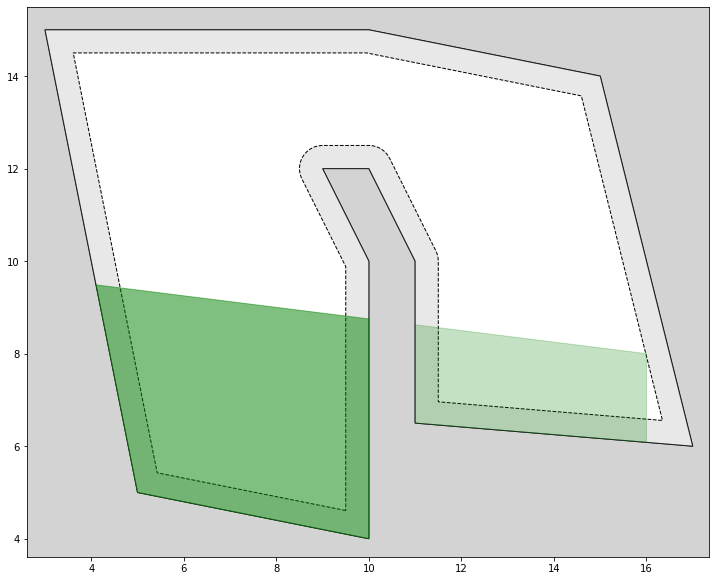

In [3]:
from pcpptc.plot import setup_plot, plot_polygon_instance

ax = setup_plot()
plot_polygon_instance(ax, pi1, plot_valuable_areas=True)
plt.show()

In [4]:
from pcpptc.plot.intermediate import plot_graph
from pcpptc.grid_solver.cycle_connecting import connect_cycles_via_pcst
from pcpptc.instance_converter.dmsh import DmshGrid
from pcpptc.grid_solver.cycle_cover.solver import CycleCoverSolver
from pcpptc.plot import plot_solution
from pcpptc.solver_selection.dmsh import DmshAlgorithm

gi1 = DmshGrid(full_coverage=False, point_based=False, buffer=0.1)(pi1)

<Figure size 432x288 with 0 Axes>

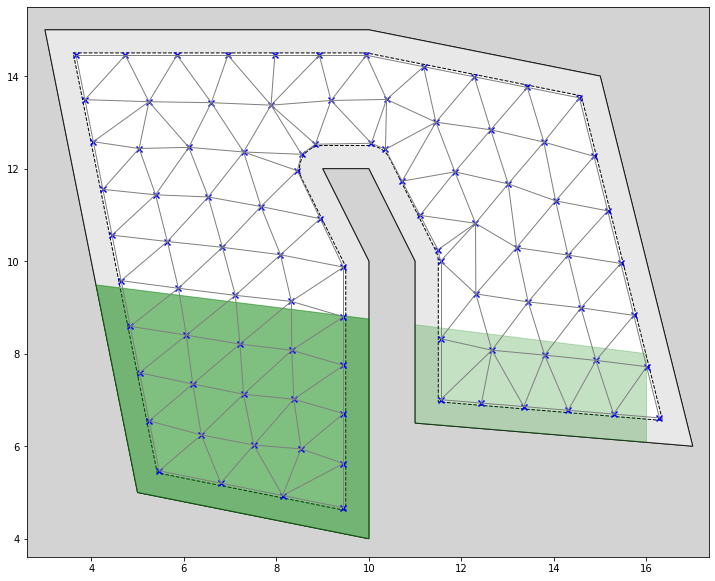

In [5]:
ax = setup_plot()
plot_polygon_instance(ax, pi1, plot_valuable_areas=True)
plot_graph(ax, gi1.graph)

Cycle Cover: Computing fractional solution...
Academic license - for non-commercial use only - expires 2021-09-25
Using license file /home/ANONYMOUS_USER/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 255 rows, 1394 columns and 2808 nonzeros
Model fingerprint: 0x9ddac848
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 255 rows, 1394 columns, 2808 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.500000e+01   0.000000e+00      0s
     169    1.4382400e+03   0.000000e+00   0.000000e+00      0s

Solved in 169 iterations and 0.01 seconds
Optimal objective  1.438239959e+03
Cycle Cover: Creating matching problem...
Cycle Cover: Solving matching...
Solve matching on 32226 edges.


<Figure size 432x288 with 0 Axes>

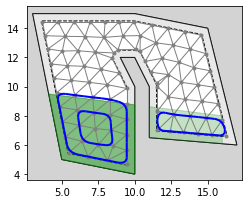

In [6]:
cc = CycleCoverSolver(k=3, r=2)(gi1)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi1, plot_valuable_areas=True)
plot_graph(ax, gi1.graph, marker=".", vertex_color="grey", edge_color="grey")
for tour in cc:
    plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.savefig("./08_cycle_a.pdf")
plt.show()

Connecting 3 cycles
Trying to connect greedily
3 cycles remaining
Computing PCST
Connecting PCST via DFS


<Figure size 432x288 with 0 Axes>

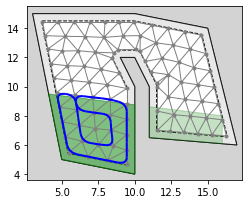

In [7]:
tour = connect_cycles_via_pcst(gi1, cc)

ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi1, plot_valuable_areas=True)
plot_graph(ax, gi1.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.savefig("./08_tour_a.pdf")
plt.show()

In [8]:
gi2 = DmshGrid(full_coverage=False, point_based=False, buffer=0.1)(pi2)

<Figure size 432x288 with 0 Axes>

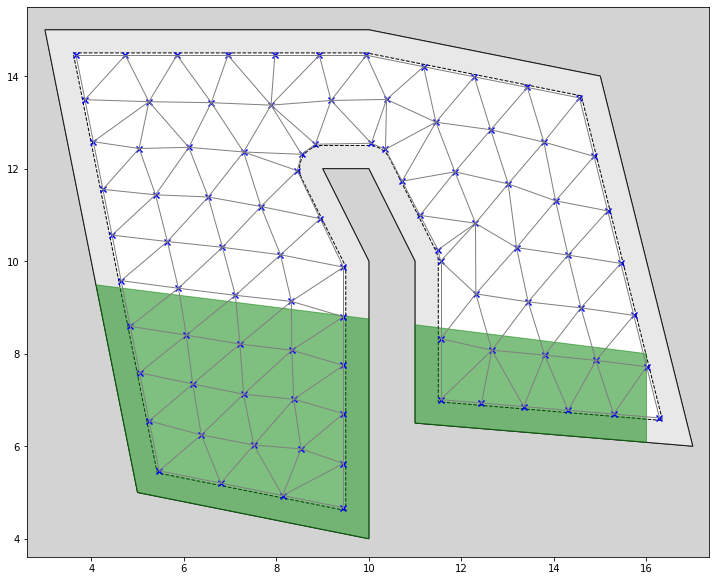

In [9]:
ax = setup_plot()
plot_polygon_instance(ax, pi2, plot_valuable_areas=True)
plot_graph(ax, gi2.graph)

Cycle Cover: Computing fractional solution...
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 255 rows, 1394 columns and 2808 nonzeros
Model fingerprint: 0xdcf005ed
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 255 rows, 1394 columns, 2808 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.500000e+01   0.000000e+00      0s
     175    1.4382400e+03   0.000000e+00   0.000000e+00      0s

Solved in 175 iterations and 0.01 seconds
Optimal objective  1.438239959e+03
Cycle Cover: Creating matching problem...
Cycle Cover: Solving matching...
Solve matching on 32226 edges.


<Figure size 432x288 with 0 Axes>

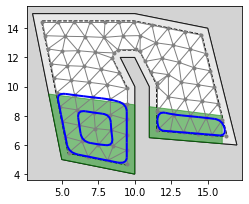

In [10]:
cc = CycleCoverSolver(k=3, r=2)(gi2)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2, plot_valuable_areas=True)
plot_graph(ax, gi2.graph, marker=".", vertex_color="grey", edge_color="grey")
for tour in cc:
    plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.savefig("./08_cycle_b.pdf")
plt.show()

Connecting 3 cycles
Trying to connect greedily
3 cycles remaining
Computing PCST
Connecting PCST via DFS


<Figure size 432x288 with 0 Axes>

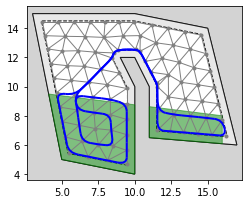

In [11]:
tour = connect_cycles_via_pcst(gi2, cc)

ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2, plot_valuable_areas=True)
plot_graph(ax, gi2.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.savefig("./08_tour_b.pdf")
plt.show()